## 数据可视化

一般而言，基于距离的算法都需要将特征归一化，因为这里 iris 数据集的特征已经在同一个数量级上，我们就没有对特征归一化了。

In [17]:
from sklearn.datasets import load_iris

iris = load_iris()

只用两个特征进行训练。

In [18]:
X = iris.data[:, :2]
y = iris.target

In [19]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

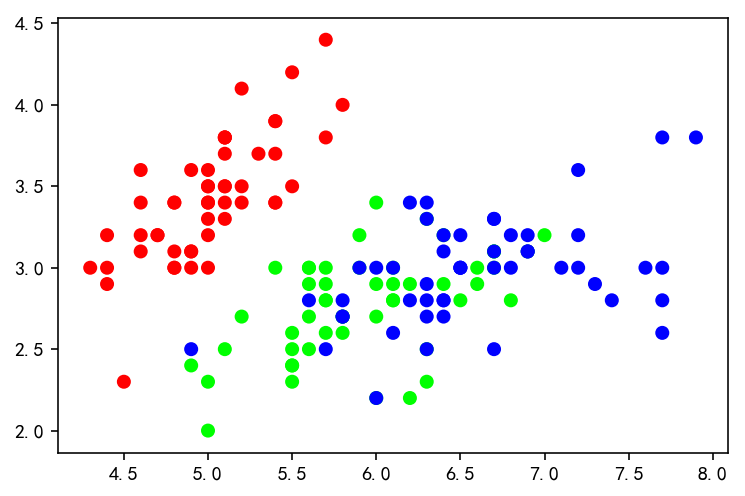

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.show()

## 使用 uniform 的 k 近邻算法

In [21]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 15
weights = 'uniform'

clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [22]:
import numpy as np

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

In [23]:
np.c_[xx.ravel(), yy.ravel()]

array([[3.3 , 1.  ],
       [3.32, 1.  ],
       [3.34, 1.  ],
       ...,
       [8.84, 5.38],
       [8.86, 5.38],
       [8.88, 5.38]])

In [24]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [25]:
Z = Z.reshape(xx.shape)

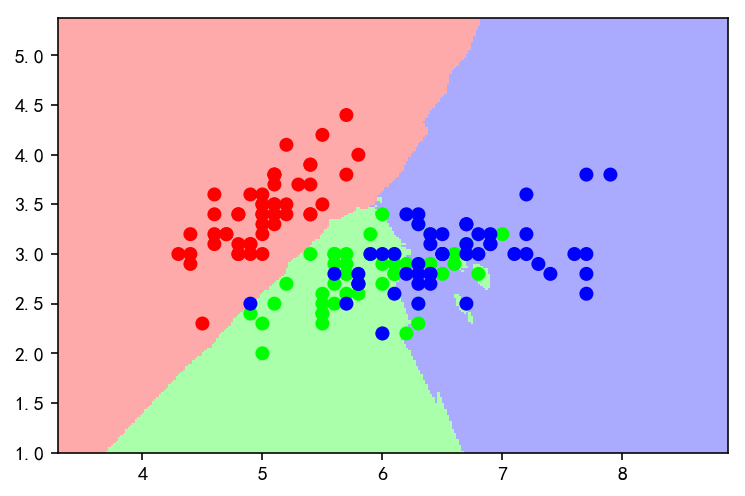

In [26]:
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.show()

## 使用 distance 的 k 近邻算法

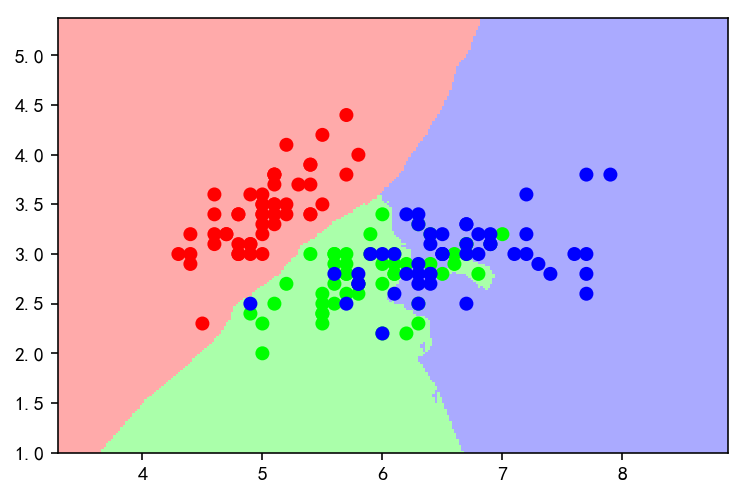

In [27]:
n_neighbors = 15
weights = 'distance'

clf2 = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
clf2.fit(X, y)
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.show()

## 使用全部特征训练

In [28]:
X = iris.data
y = iris.target

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=666)

In [30]:
clf = KNeighborsClassifier(n_neighbors= 5)

In [31]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

## 试试 xgboost

In [16]:
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.98